# Visualize football stadiums

This notebook visualizes the data geocoded in [foursquare-geocode-football-stadiums.ipynb](foursquare-geocode-football-stadiums.ipynb). The dataset comprises all the Division I college football stadiums in the US (FBS and FCS) comes from [here](https://en.wikipedia.org/wiki/List_of_NCAA_Division_I_FBS_football_stadiums) and [here](https://en.wikipedia.org/wiki/List_of_NCAA_Division_I_FCS_football_stadiums).

In [1]:
import pandas as pd, numpy as np, matplotlib.pyplot as plt, json
import matplotlib.font_manager as fm, matplotlib.cm as cm, matplotlib.patches as mpatches
from mpl_toolkits.basemap import Basemap

%matplotlib inline

In [2]:
input_filename = 'data/stadiums-geocoded.csv'
df = pd.read_csv(input_filename, encoding='utf-8')
df.head()

,stadium,city,state,team,conference,capacity,built,expanded,div,latitude,longitude
0,Michigan Stadium,Ann Arbor,MI,Michigan,Big Ten,107601,1927,2015,fbs,42.265869,-83.748726
1,Beaver Stadium,University Park,PA,Penn State,Big Ten,106572,1960,2001,fbs,40.812153,-77.856202
2,Ohio Stadium,Columbus,OH,Ohio State,Big Ten,104944,1922,2014,fbs,40.001686,-83.019728
3,Kyle Field,College Station,TX,Texas A&M,SEC,102733,1927,2015,fbs,30.610098,-96.340729
4,Neyland Stadium,Knoxville,TN,Tennessee,SEC,102455,1921,2010,fbs,35.954734,-83.925333


## Visualize the mean seating capacity by conference

In [3]:
title_font = fm.FontProperties(family='Bitstream Vera Sans', style='normal', size=16, weight='bold', stretch='normal')
label_font = fm.FontProperties(family='Bitstream Vera Sans', style='normal', size=14, weight='normal', stretch='normal')

In [4]:
df_plot = df.groupby('conference')['capacity'].mean()
df_plot = df_plot.sort_values(ascending=False)
df_plot = df_plot / 1000

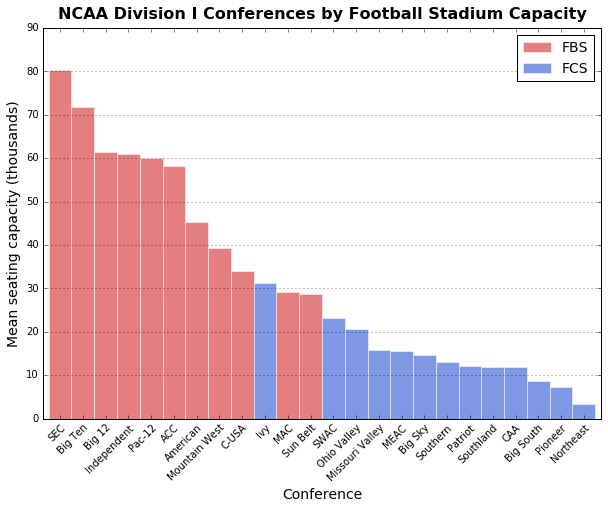

In [5]:
divs = [df[df['conference']==label].iloc[0]['div'] for label in df_plot.index]
colors = ['#cc0000' if div=='fbs' else '#0033cc' for div in divs]

ax = df_plot.plot(kind='bar', figsize=[10, 7], color=colors, width=1, alpha=0.5, ec='w')
ax.yaxis.grid(True)
ax.set_xticklabels(df_plot.index, rotation=45, rotation_mode='anchor', ha='right')
ax.set_xlabel('Conference', fontproperties=label_font)
ax.set_ylabel('Mean seating capacity (thousands)', fontproperties=label_font)
ax.set_title('NCAA Division I Conferences by Football Stadium Capacity', fontproperties=title_font, y=1.01)

fbs_patch = mpatches.Patch(fc='#cc0000', alpha=0.5, ec='w', label='FBS')
fcs_patch = mpatches.Patch(fc='#0033cc', alpha=0.5, ec='w', label='FCS')
ax.legend(handles=[fbs_patch, fcs_patch], prop={'size':14})

plt.savefig('images/conferences-bar.png', dpi=96, bbox_inches='tight', pad_inches=0.1)
plt.show()

## Visualize the seating capacity by school/team

In [6]:
df_plot = df.groupby('team')['capacity'].mean()
df_plot = df_plot.sort_values(ascending=False)
df_plot = df_plot / 1000

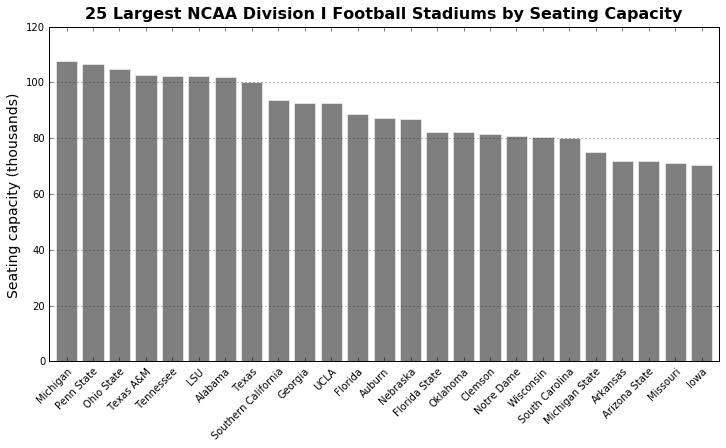

In [7]:
ax = df_plot.head(25).plot(kind='bar', figsize=[12, 6], width=0.8, alpha=0.5, color='k', edgecolor='w')
ax.yaxis.grid(True)
ax.set_ylim([0, 120])
ax.set_xticklabels(df_plot.index, rotation=45, rotation_mode='anchor', ha='right')
ax.set_xlabel('', fontproperties=label_font)
ax.set_ylabel('Seating capacity (thousands)', fontproperties=label_font)
ax.set_title('25 Largest NCAA Division I Football Stadiums by Seating Capacity', fontproperties=title_font, y=1.01)

plt.savefig('images/stadiums-top-bar.png', dpi=96, bbox_inches='tight', pad_inches=0.1)
plt.show()

In [8]:
title_font = fm.FontProperties(family='Bitstream Vera Sans', style='normal', size=60, weight='bold', stretch='normal')
label_font = fm.FontProperties(family='Bitstream Vera Sans', style='normal', size=50, weight='normal', stretch='normal')
ticks_font = fm.FontProperties(family='Bitstream Vera Sans', style='normal', size=35, weight='normal', stretch='normal')

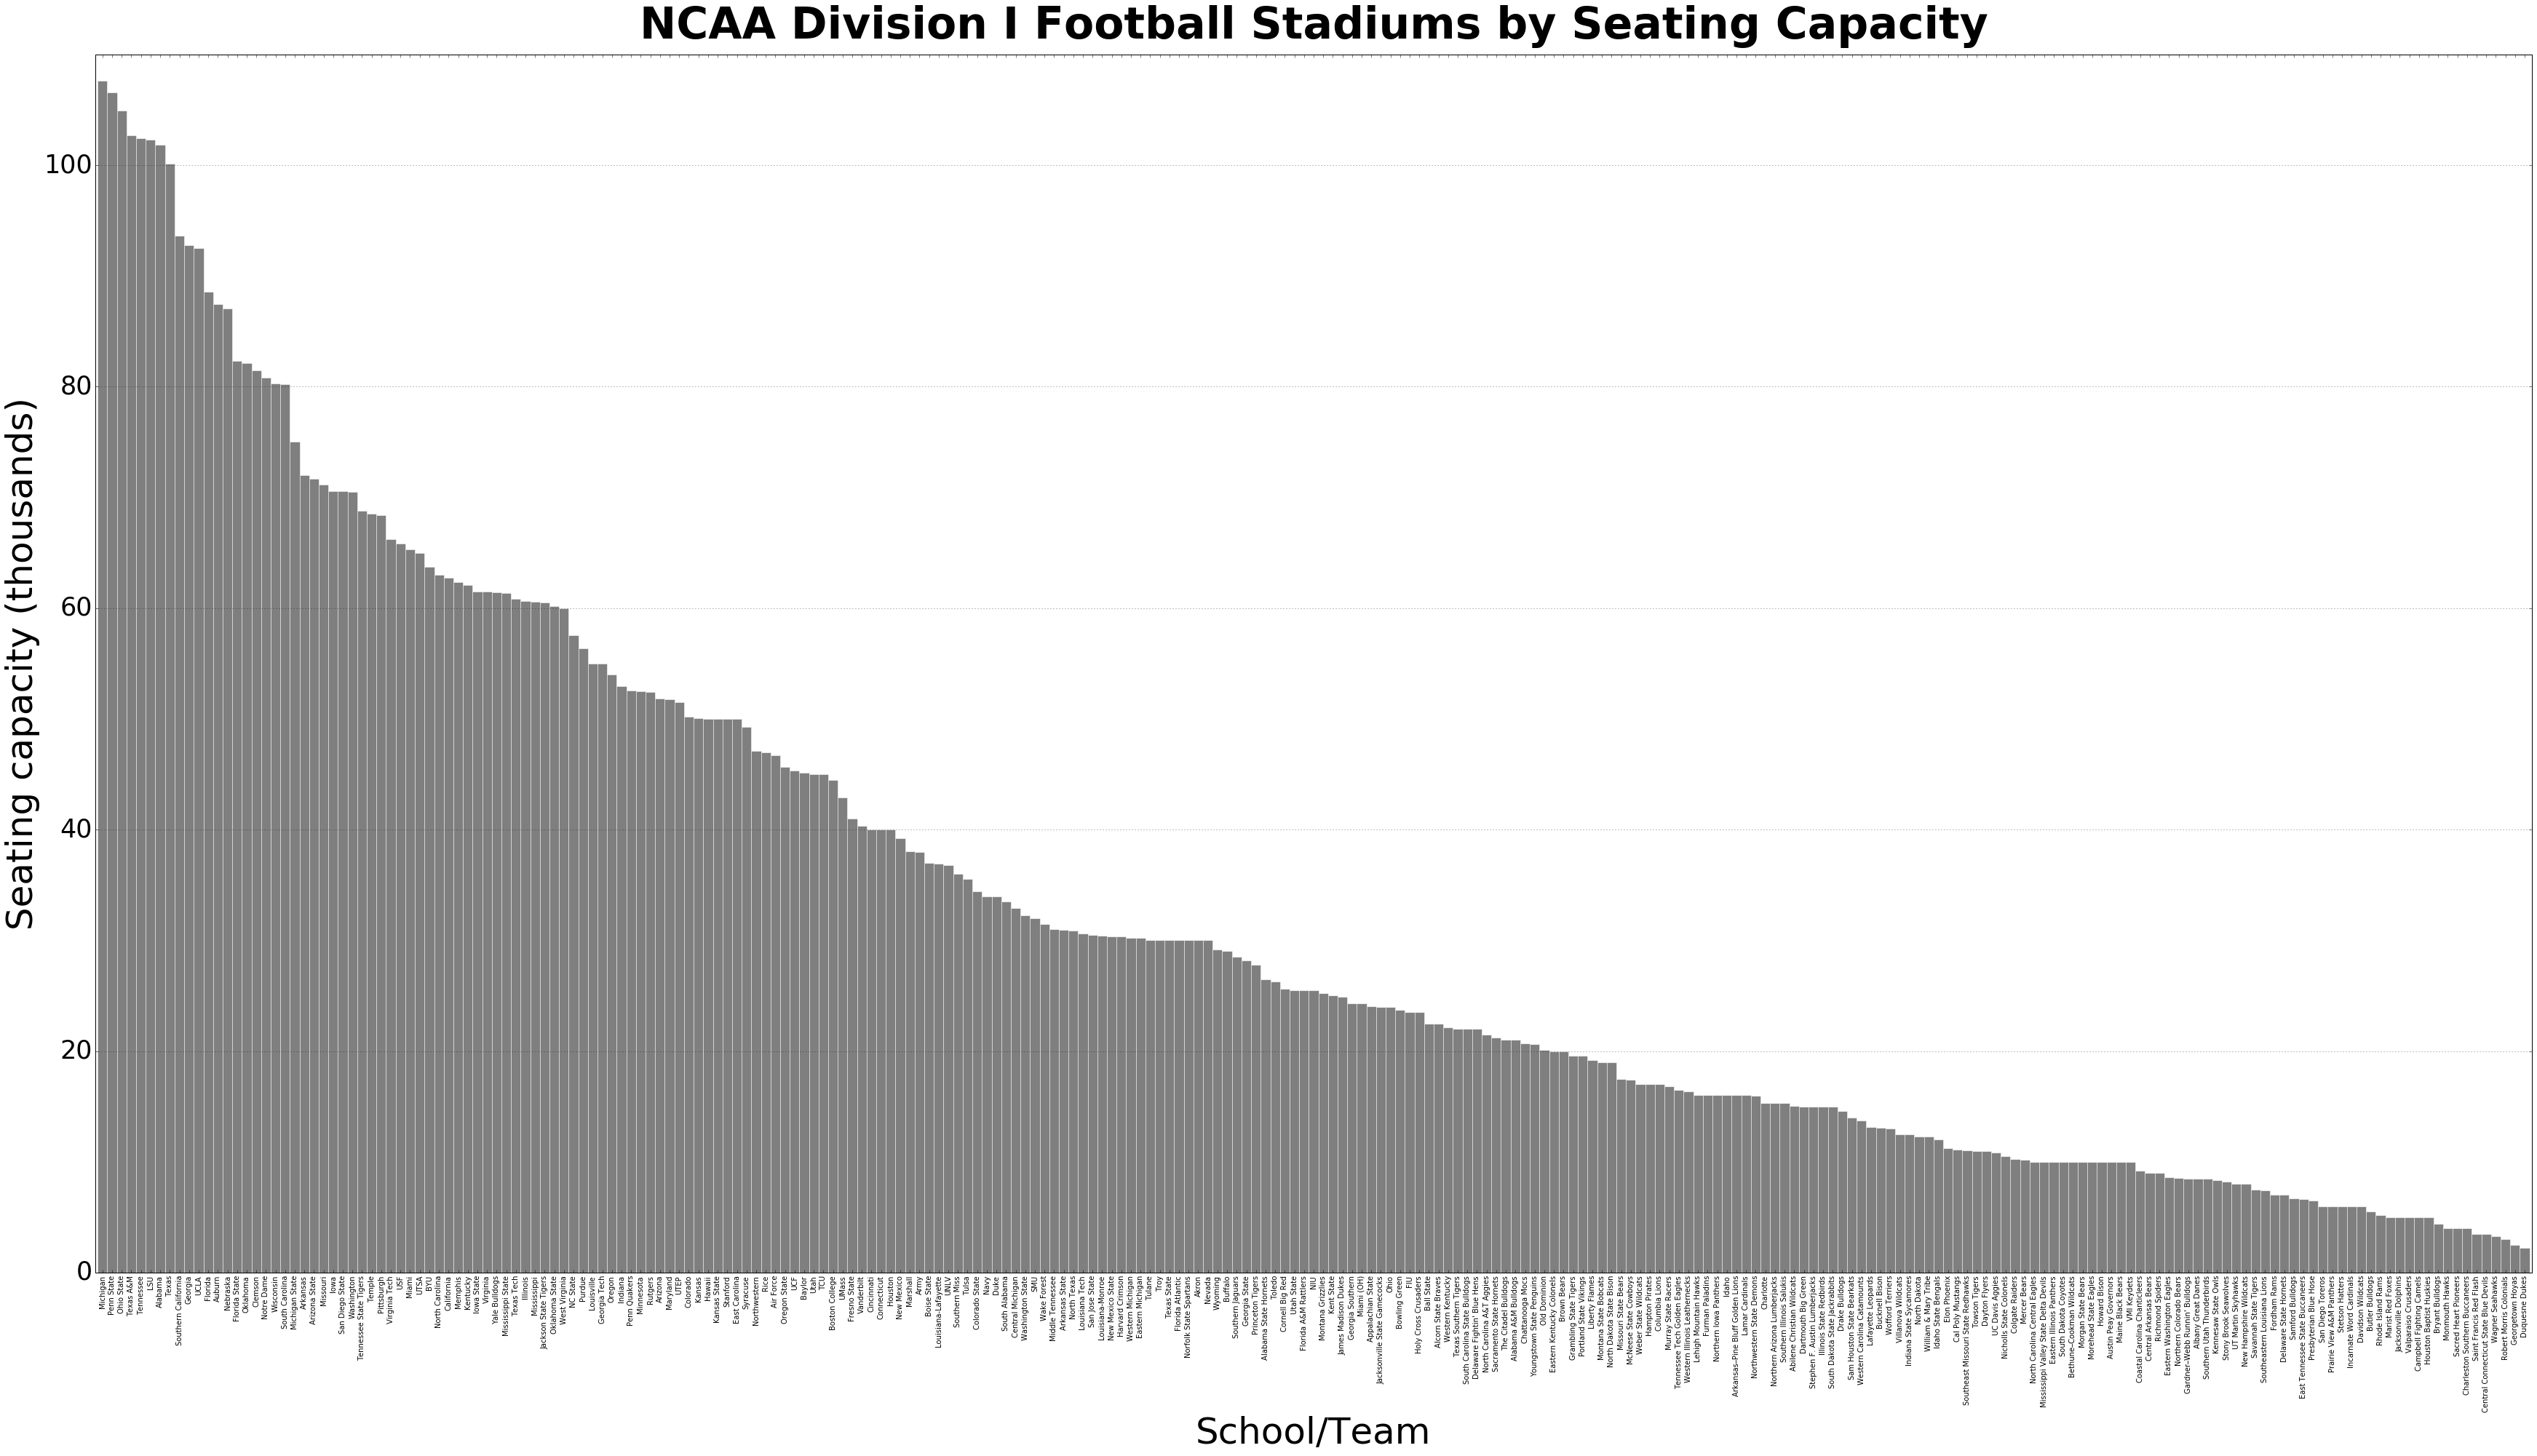

In [9]:
ax = df_plot.plot(kind='bar', figsize=[60, 30], width=1, alpha=0.5, color='k', edgecolor='w')
ax.yaxis.grid(True)
ax.set_ylim([0, 110])
for label in ax.get_yticklabels():
    label.set_fontproperties(ticks_font)
ax.set_xlabel('School/Team', fontproperties=label_font)
ax.set_ylabel('Seating capacity (thousands)', fontproperties=label_font)
ax.set_title('NCAA Division I Football Stadiums by Seating Capacity', fontproperties=title_font, y=1.01)

plt.savefig('images/stadiums-bar.png', dpi=96, bbox_inches='tight', pad_inches=0.5)
plt.show()

#### Next, do the same thing again, but this time color each bar by division:

In [10]:
divs = [df[df['team']==label].iloc[0]['div'] for label in df_plot.index]
colors = ['#cc0000' if div=='fbs' else '#0033cc' for div in divs]

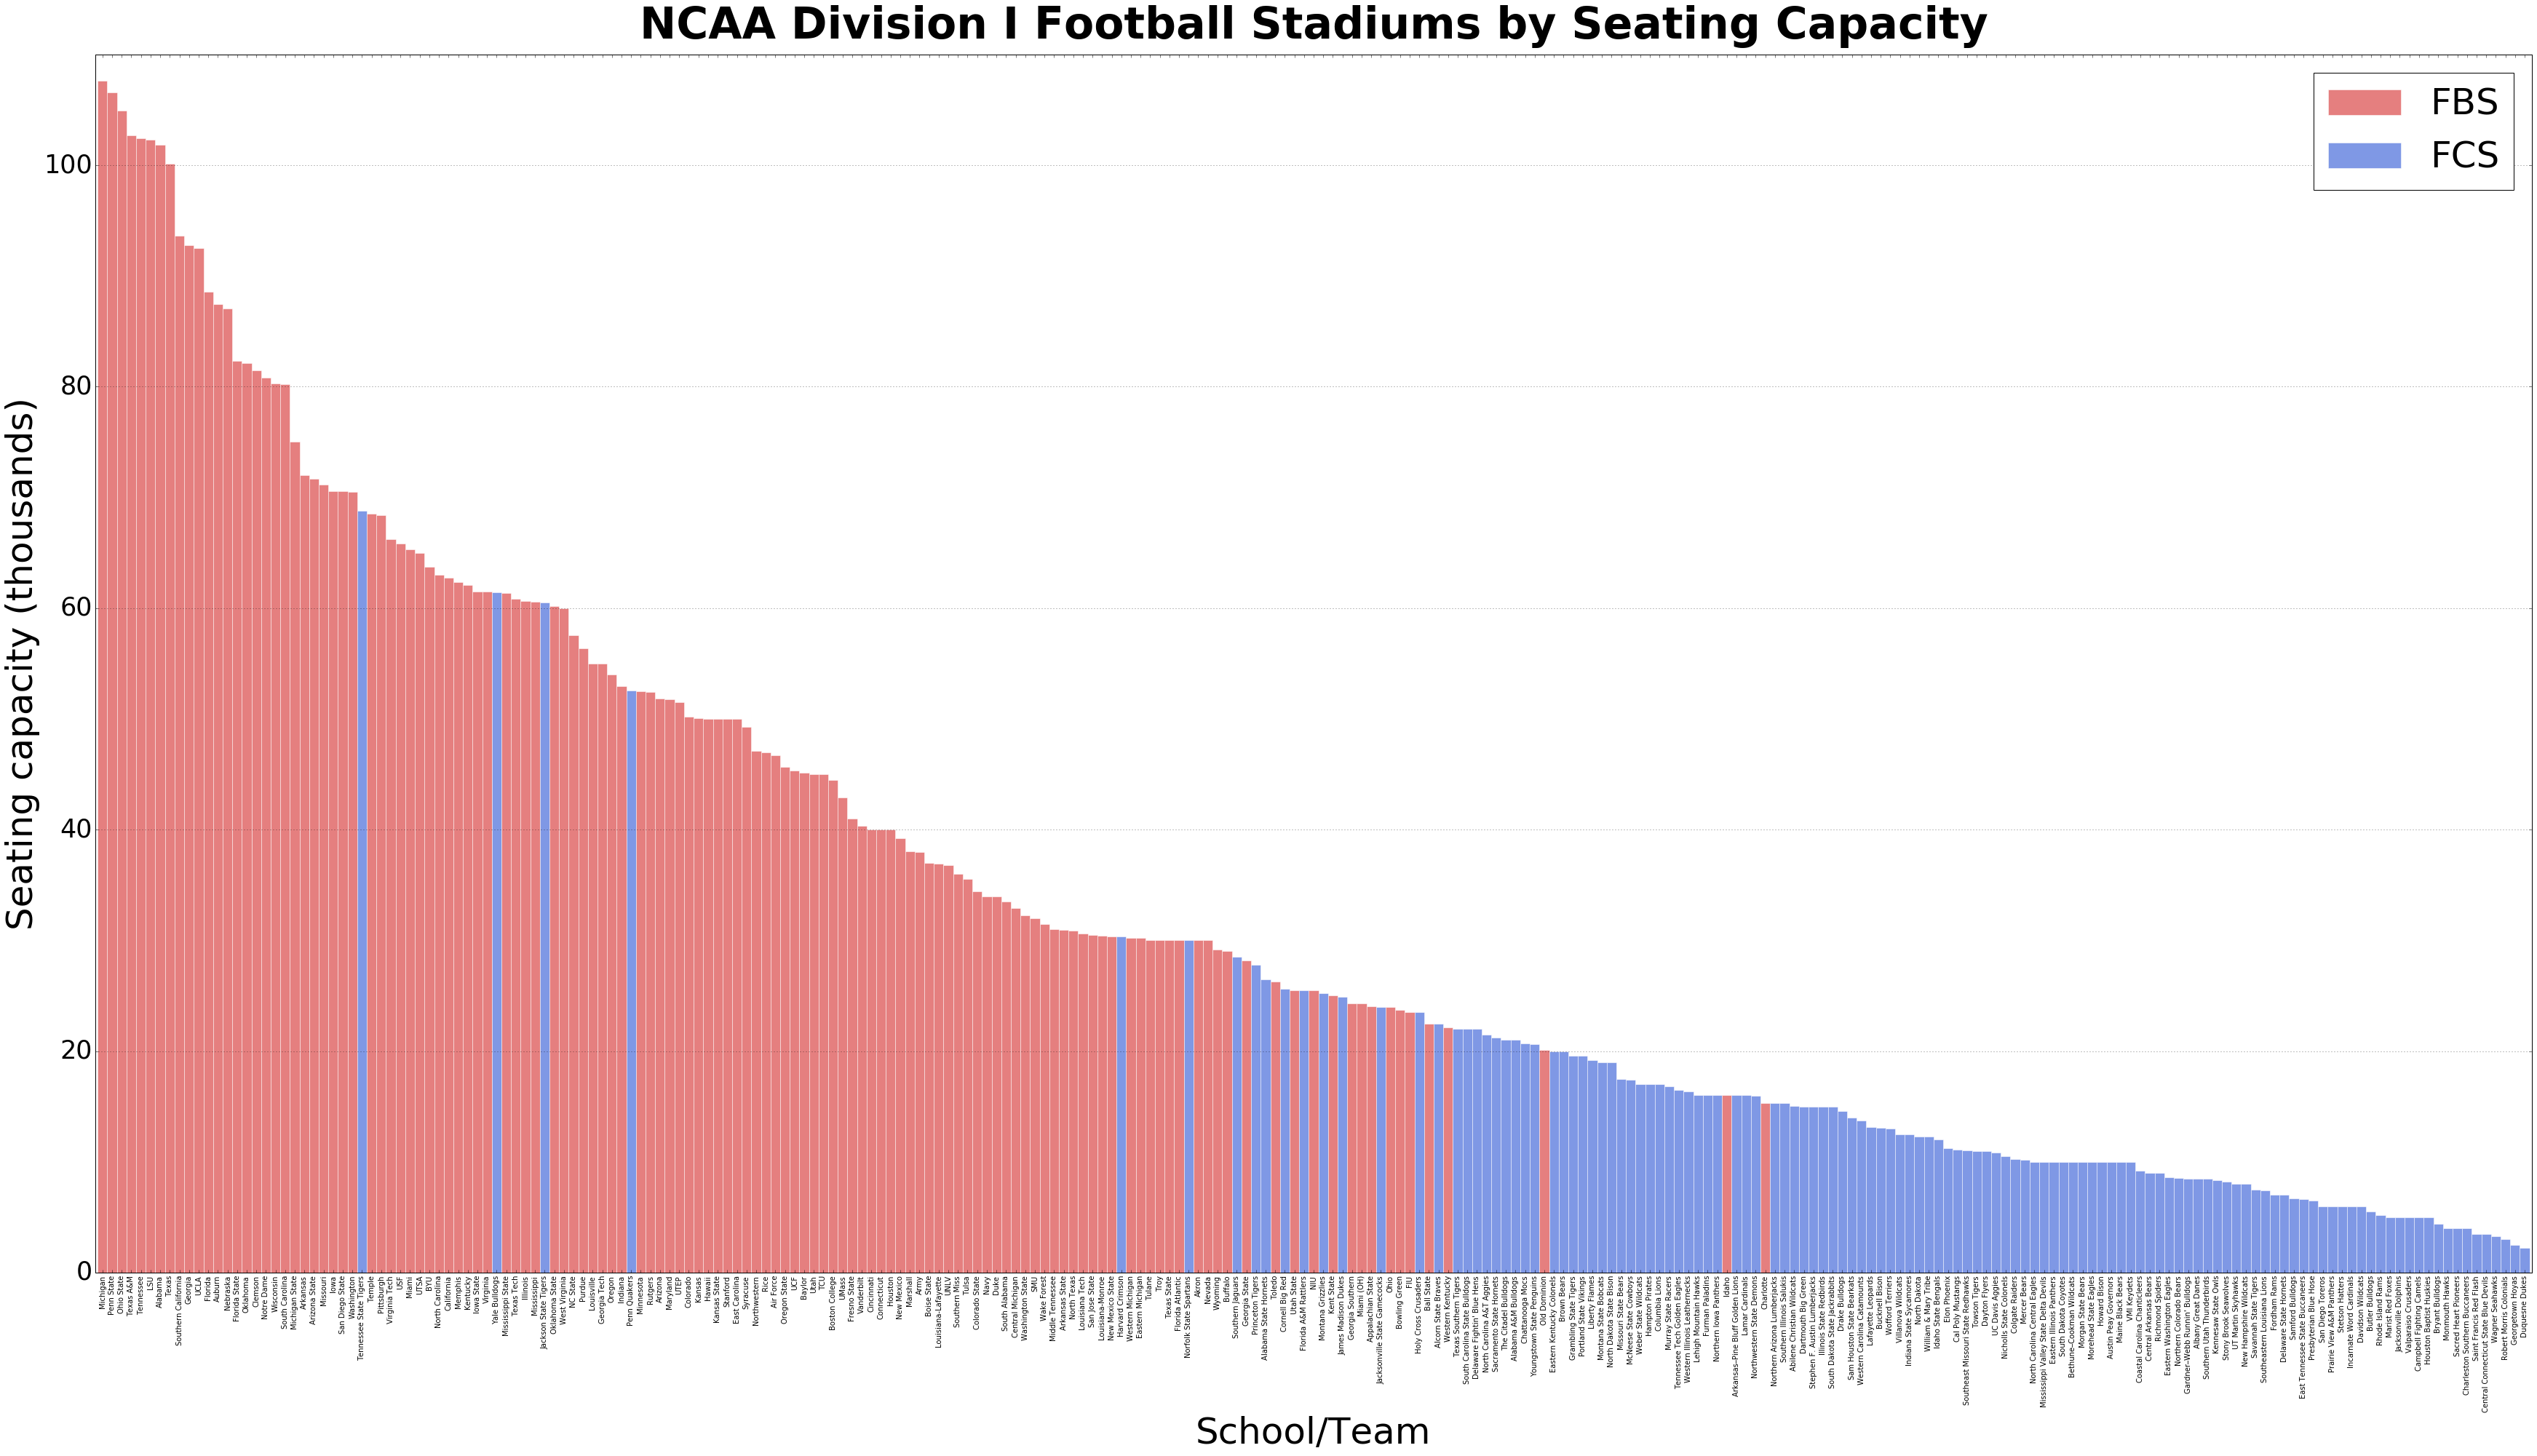

In [11]:
ax = df_plot.plot(kind='bar', figsize=[60, 30], width=1, alpha=0.5, color=colors, edgecolor='w')
ax.yaxis.grid(True)
ax.set_ylim([0, 110])
for label in ax.get_yticklabels():
    label.set_fontproperties(ticks_font)
ax.set_xlabel('School/Team', fontproperties=label_font)
ax.set_ylabel('Seating capacity (thousands)', fontproperties=label_font)
ax.set_title('NCAA Division I Football Stadiums by Seating Capacity', fontproperties=title_font, y=1.01)

fbs_patch = mpatches.Patch(fc='#cc0000', alpha=0.5, ec='w', label='FBS')
fcs_patch = mpatches.Patch(fc='#0033cc', alpha=0.5, ec='w', label='FCS')
ax.legend(handles=[fbs_patch, fcs_patch], prop={'size':50})

plt.savefig('images/stadiums-div-bar.png', dpi=96, bbox_inches='tight', pad_inches=0.5)
plt.show()

#### Next, do the same thing again, but this time color each bar by conference:

In [12]:
# get a list of colors, one for each conference sorted from greatest to lowest mean capacity
confs_by_capacity = df.groupby('conference')['capacity'].mean().sort_values(ascending=False)
confs = np.array([df[df['team']==label].iloc[0]['conference'] for label in df_plot.index])
bins = len(confs_by_capacity)
color_map = cm.get_cmap('spectral')
increments = [x/float(bins) for x in range(bins)]
color_list = color_map(increments).tolist() 
color_list.reverse()
conf_colors = {}
for conf, color in zip(confs_by_capacity.index, color_list):
    conf_colors[conf] = color
colors = [conf_colors[conf] for conf in confs]

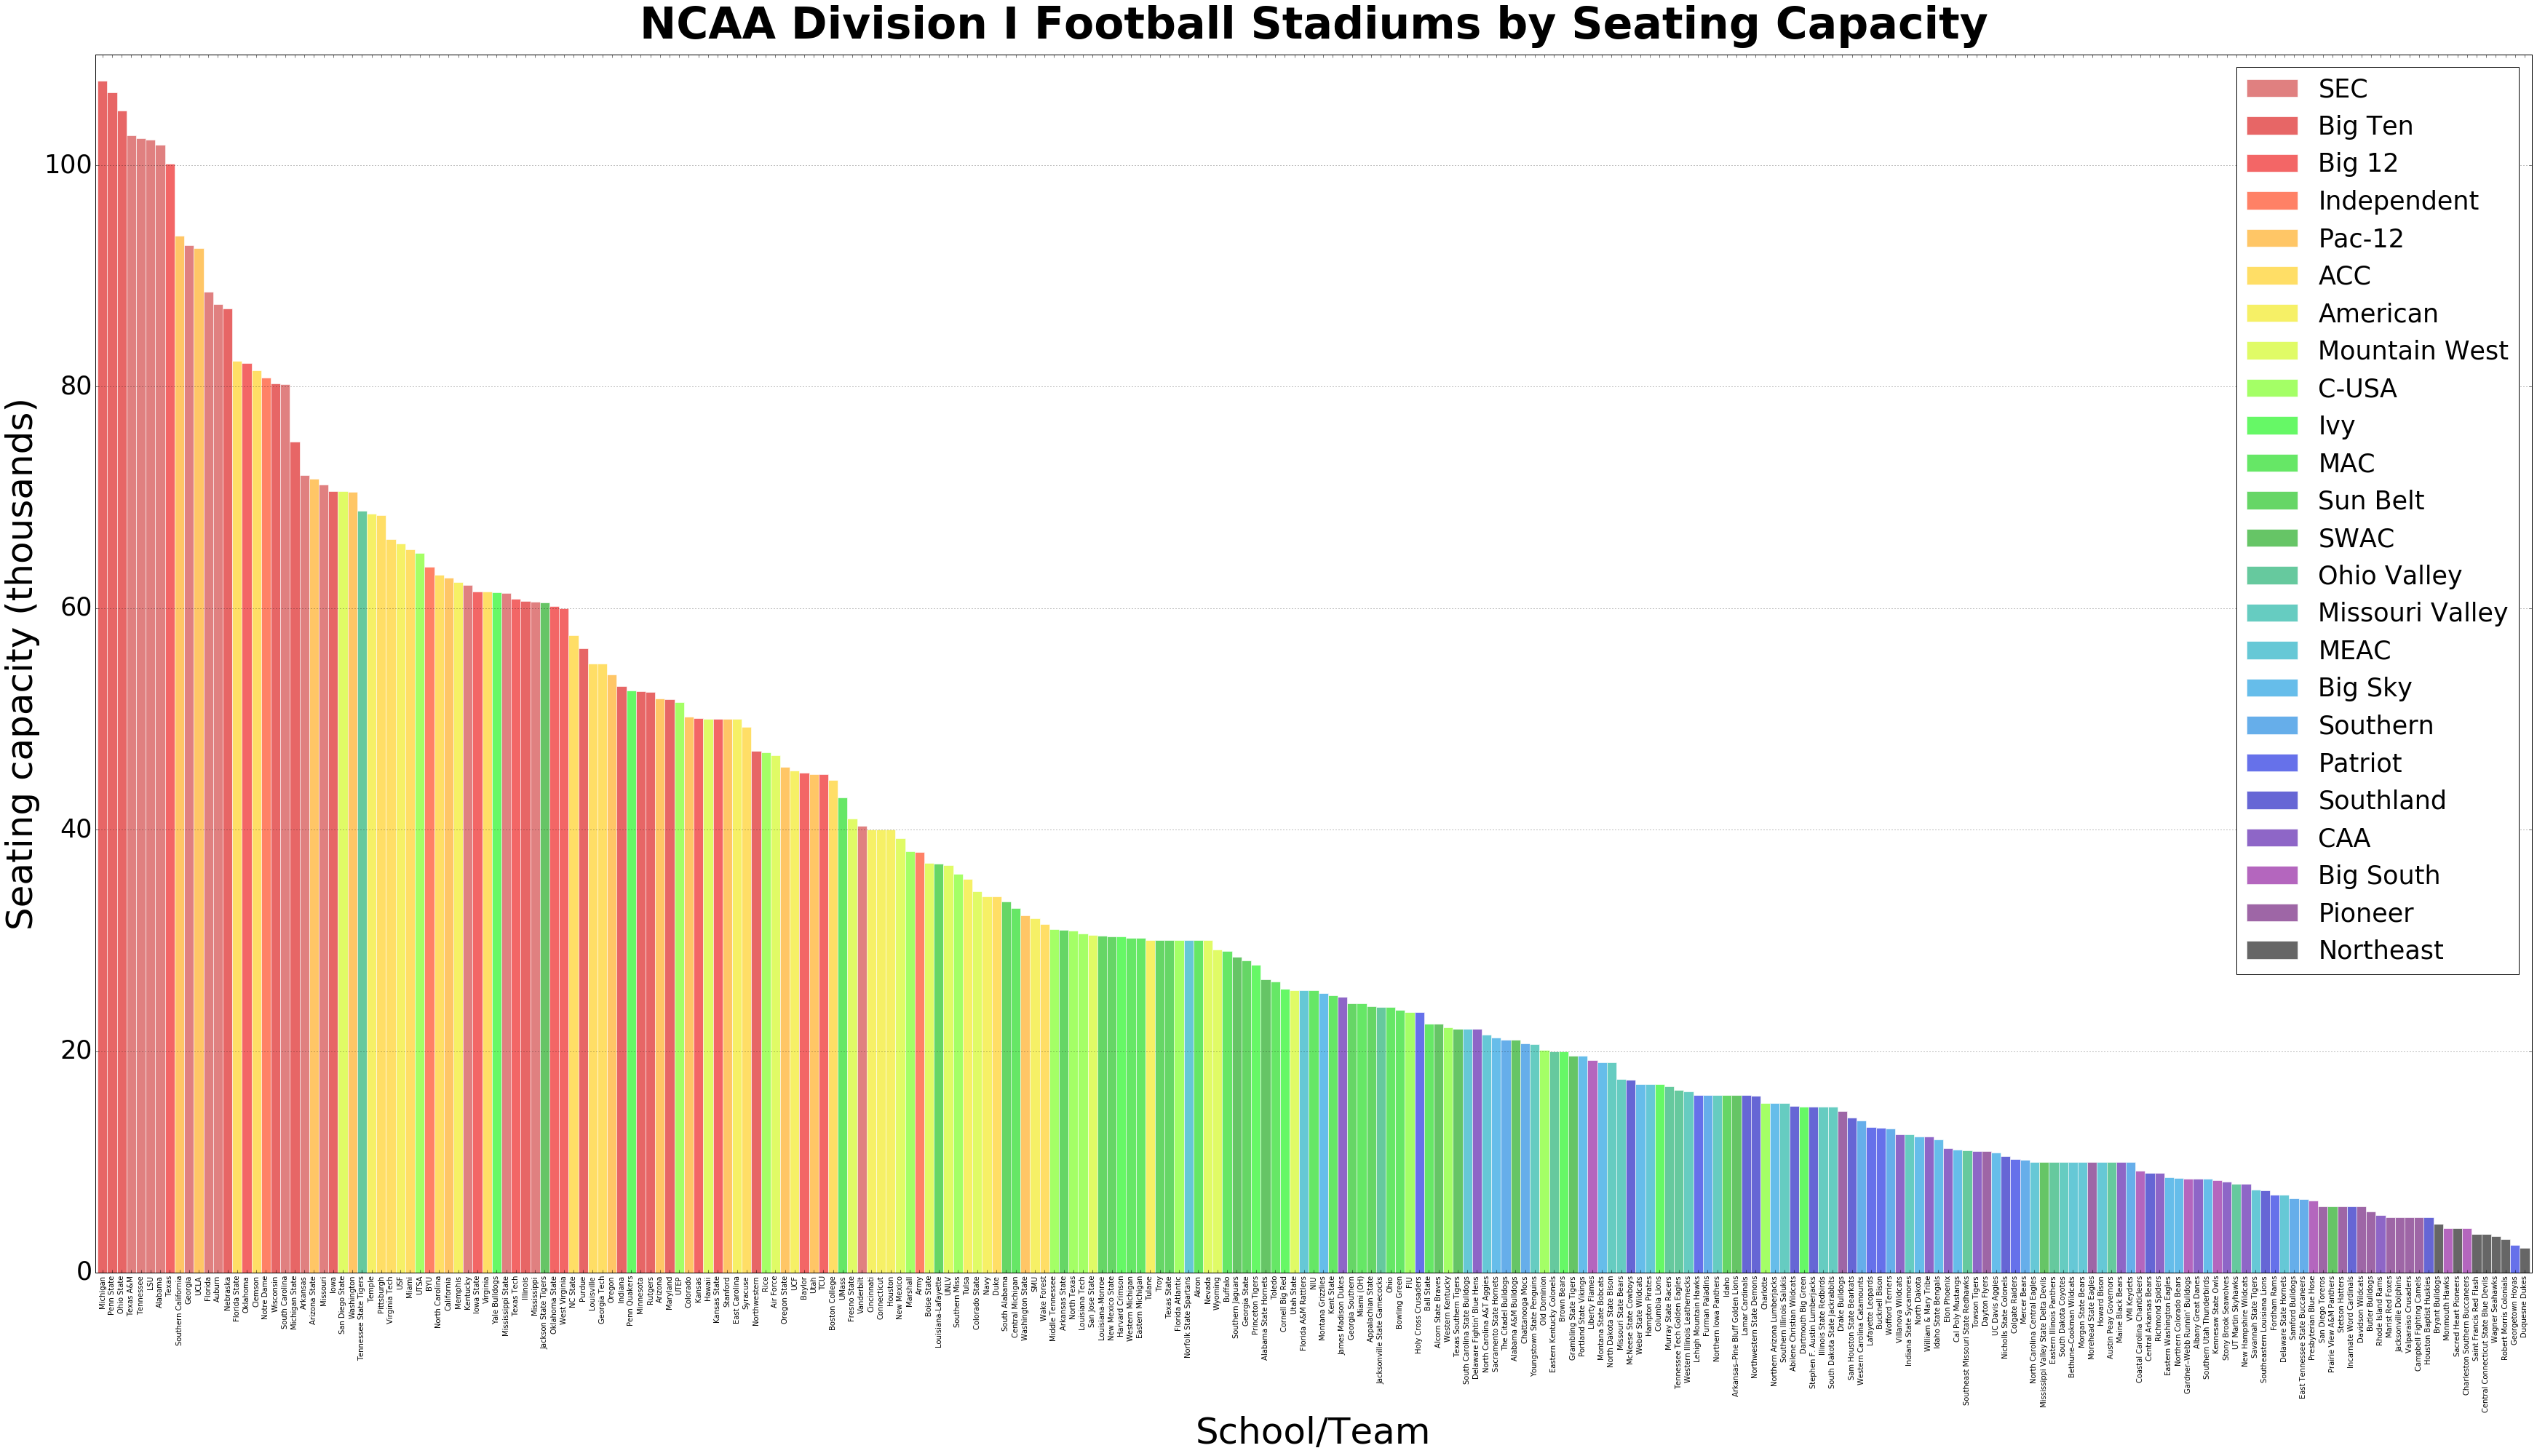

In [13]:
ax = df_plot.plot(kind='bar', figsize=[60, 30], width=1, alpha=0.6, color=colors, edgecolor='w')
ax.yaxis.grid(True)
ax.set_ylim([0, 110])
for label in ax.get_yticklabels():
    label.set_fontproperties(ticks_font)
ax.set_xlabel('School/Team', fontproperties=label_font)
ax.set_ylabel('Seating capacity (thousands)', fontproperties=label_font)
ax.set_title('NCAA Division I Football Stadiums by Seating Capacity', fontproperties=title_font, y=1.01)

legend_patches = []
for conf in confs_by_capacity.index:
    patch = mpatches.Patch(fc=conf_colors[conf], alpha=0.6, ec='w', label=conf)
    legend_patches.append(patch)
ax.legend(handles=legend_patches, prop={'size':35})

plt.savefig('images/stadiums-conf-bar.png', dpi=96, bbox_inches='tight', pad_inches=0.5)
plt.show()

#### Next, do it just for FBS teams:

In [14]:
df_fbs = df[df['div']=='fbs']
df_plot = df_fbs.groupby('team')['capacity'].mean()
df_plot = df_plot.sort_values(ascending=True)
df_plot = df_plot / 1000

In [15]:
# get a list of colors, one for each conference sorted from greatest to lowest mean capacity
confs_by_capacity = df_fbs.groupby('conference')['capacity'].mean().sort_values(ascending=True)
confs = np.array([df_fbs[df_fbs['team']==label].iloc[0]['conference'] for label in df_plot.index])
bins = len(confs_by_capacity)
color_map = cm.get_cmap('spectral')
increments = [x/float(bins) for x in range(bins)]
color_list = color_map(increments).tolist() 
#color_list.reverse()
conf_colors = {}
for conf, color in zip(confs_by_capacity.index, color_list):
    conf_colors[conf] = color
colors = [conf_colors[conf] for conf in confs]

In [16]:
title_font = fm.FontProperties(family='Bitstream Vera Sans', style='normal', size=25, weight='bold', stretch='normal')
label_font = fm.FontProperties(family='Bitstream Vera Sans', style='normal', size=20, weight='normal', stretch='normal')
xticks_font = fm.FontProperties(family='Bitstream Vera Sans', style='normal', size=14, weight='normal', stretch='normal')
yticks_font = fm.FontProperties(family='Bitstream Vera Sans', style='normal', size=12, weight='normal', stretch='normal')
legend_size = 20

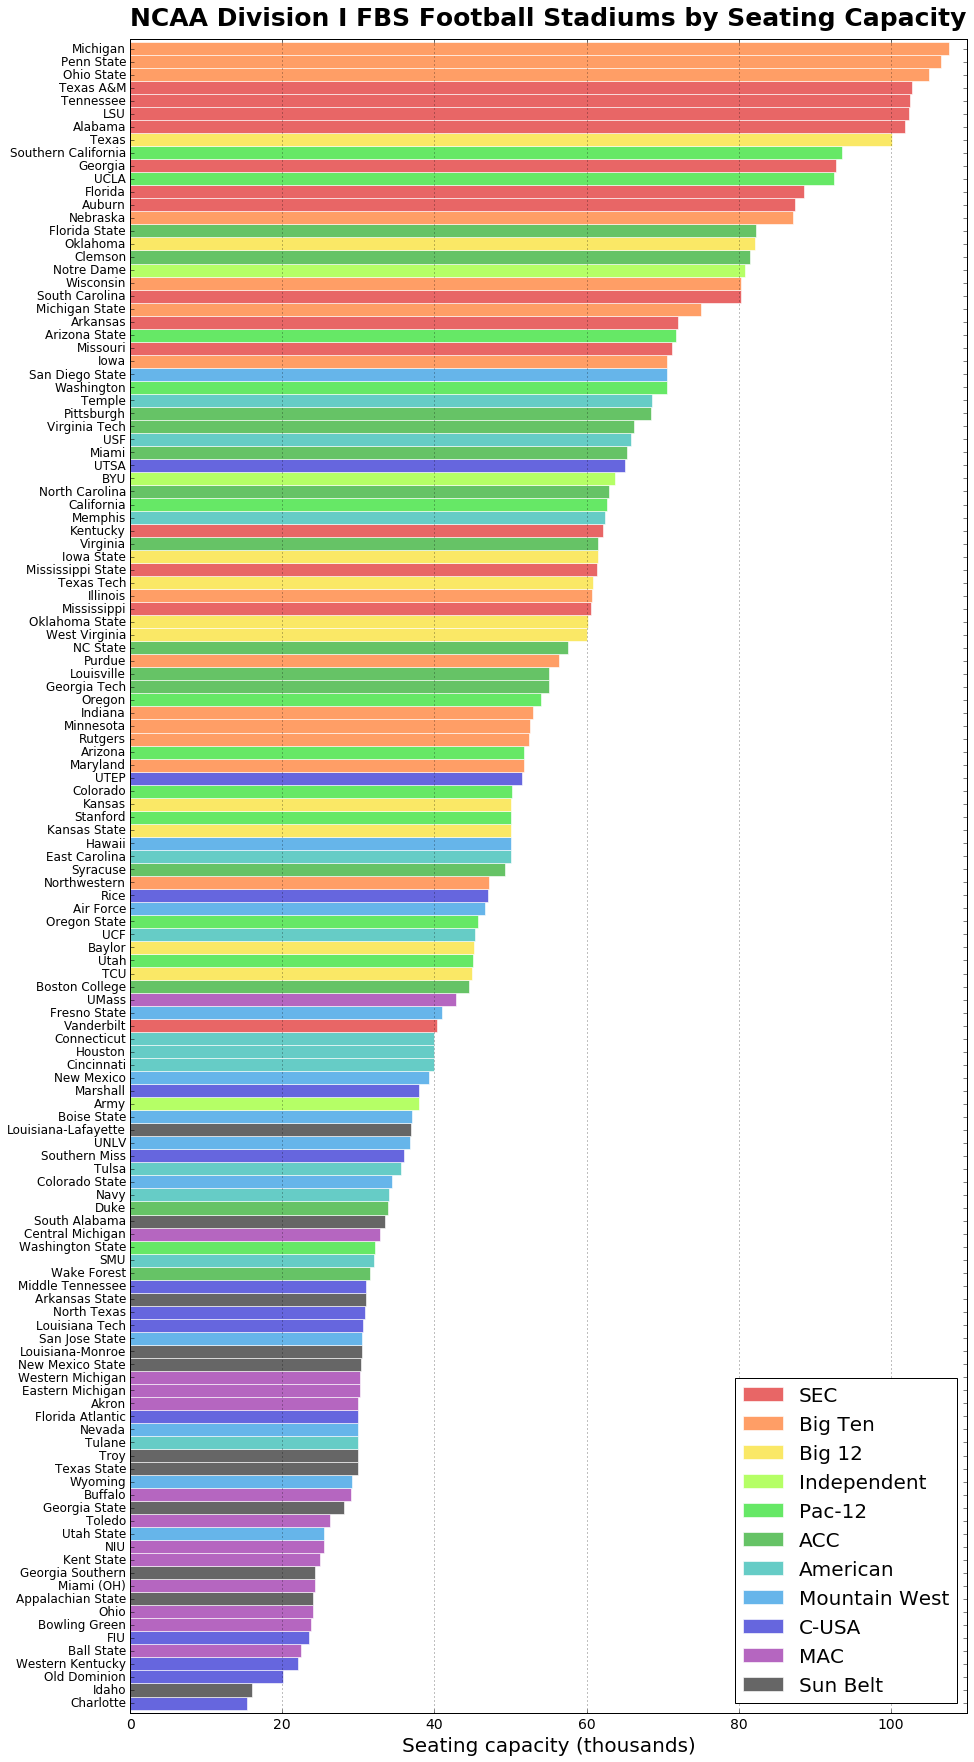

In [17]:
ax = df_plot.plot(kind='barh', figsize=[15, 30], width=1, alpha=0.6, color=colors, edgecolor='w')
ax.xaxis.grid(True)
ax.set_xlim([0, 110])
for label in ax.get_xticklabels():
    label.set_fontproperties(xticks_font)
for label in ax.get_yticklabels():
    label.set_fontproperties(yticks_font)
ax.set_xlabel('Seating capacity (thousands)', fontproperties=label_font)
ax.set_ylabel('', fontproperties=label_font)
ax.set_title('NCAA Division I FBS Football Stadiums by Seating Capacity', fontproperties=title_font, y=1.005)

legend_patches = []
for conf in confs_by_capacity.index:
    patch = mpatches.Patch(fc=conf_colors[conf], alpha=0.6, ec='w', label=conf)
    legend_patches.append(patch)
legend_patches.reverse()
ax.legend(handles=legend_patches, loc=4, prop={'size':legend_size})

plt.savefig('images/stadiums-fbs-conf-bar.png', dpi=96, bbox_inches='tight', pad_inches=0.3)
plt.show()

## Next, map the stadiums

Color them by division (FBS vs FCS) and make the marker sizes relative to the stadium seating capacity

In [18]:
# define basemap colors
land_color = '#f5f5f3'
water_color = '#cdd2d4'
coastline_color = '#666666'
border_color = '#999999'

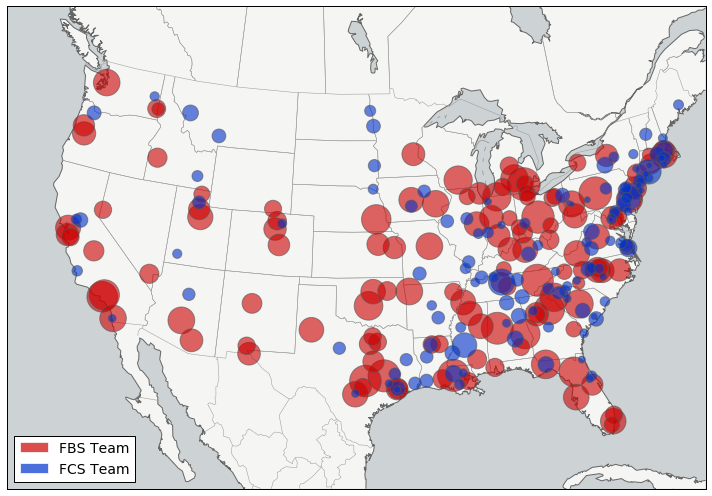

In [19]:
# specify map width and height with approx US dimensions
map_width_m = 5000 * 1000
map_height_m = 3500 * 1000
fig_width_in = 10
plt.figure(figsize=[fig_width_in, fig_width_in*(map_height_m/float(map_width_m))]) #make plot the same height:width ratio

# Albers Conical Equal Area projection for US
m = Basemap(ellps='WGS84', projection='aea', lat_1=33, lat_2=45, lon_0=-98.4, lat_0=39,
            width=map_width_m, height=map_height_m, resolution='l', area_thresh=10000, fix_aspect=False)

m.drawcoastlines(color=coastline_color)
m.drawcountries(color=border_color)
m.drawstates(color=border_color)
m.fillcontinents(color=land_color, lake_color=water_color)
m.drawmapboundary(fill_color=water_color)

# project and plot our lat-long data with each bin getting its own color
for div, color in zip(['fbs', 'fcs'], ['#cc0000', '#0033cc']):
    subset = df[df['div']==div]
    sizes = subset['capacity'] / 100
    x, y = m(np.array(subset['longitude']), np.array(subset['latitude']))
    m.scatter(x=x, y=y, s=sizes, color=color, edgecolor='#555555', alpha=0.6, zorder=3)

fbs_patch = mpatches.Patch(fc='#cc0000', alpha=0.7, ec='w', label='FBS Team')
fcs_patch = mpatches.Patch(fc='#0033cc', alpha=0.7, ec='w', label='FCS Team')
legend = plt.legend(handles=[fbs_patch, fcs_patch], loc=3, prop={'size':14})

fig = plt.gcf()
fig.tight_layout()
fig.savefig('images/stadiums-map.png', dpi=300, bbox_inches='tight', pad_inches=0.1)
plt.show()

## Finally, save data to geojson for leaflet mapping

In [20]:
# function to write the dataframe out to geojson
def df_to_geojson(df, properties, lat='latitude', lon='longitude'):
    # create a new python dict to contain our geojson data, using geojson format
    geojson = {'type':'FeatureCollection', 'features':[]}

    # loop through each row in the dataframe and convert each row to geojson format
    for _, row in df.iterrows():
        # create a feature template to fill in
        feature = {'type':'Feature',
                   'properties':{},
                   'geometry':{'type':'Point',
                               'coordinates':[]}}

        # fill in the coordinates
        feature['geometry']['coordinates'] = [row[lon],row[lat]]

        # for each column, get the value and add it as a new feature property
        for prop in properties:
            feature['properties'][prop] = row[prop]
        
        # add this feature (aka, converted dataframe row) to the list of features inside our dict
        geojson['features'].append(feature)
    
    return geojson

In [21]:
# format capacity nicely for web display and only retain necessary columns
df['capacity'] = df['capacity'].map(lambda x: '{:,}'.format(x))
cols = ['stadium', 'team', 'city', 'state', 'conference', 'capacity', 'built', 'div']

geojson = df_to_geojson(df, cols)

In [22]:
# save the geojson result to a file
output_filename = 'leaflet/stadiums-dataset.js'
with open(output_filename, 'wb') as output_file:
    output_file.write('var dataset = {};'.format(json.dumps(geojson)))
    
# how many features did we save to the geojson file?
print '{} geotagged features saved to file'.format(len(geojson['features']))

254 geotagged features saved to file
